Implementacion de un Modelo autoregresivo para la prediccion de valores trimestrales de exportaciones por industria Mexicana
---
### Objetivo. En esta demostracion realizamos un  análisis de series de tiempo utilizando técnicas estadisticas en R. 

#### Métodos para el análisis de series de tiempo.

##### El análisis de series de tiempo significa analizar los datos disponibles para descubrir el patrón o la tendencia en los datos para predecir algunos valores futuros que, a su vez, ayudarán a que sean más efectivas y optimicen las decisiones de negocios.
> Conceptos Clave: 
* Tendencia: un aumento o disminución a largo plazo de los datos se denomina tendencia. No es necesariamente lineal. Es el patrón subyacente en los datos a lo largo del tiempo.
* Estacionalidad: cuando una serie está influenciada por factores estacionales, es decir, un trimestre del año, mes o días de una semana, la estacionalidad existe en la serie. Siempre es de un período fijo y conocido. Por ejemplo, un aumento repentino en las ventas durante la Navidad, etc.
* Cíclicidad: cuando los datos muestran subidas y caídas que no son del período fijo, lo llamamos patrón cíclico. Por ejemplo, la duración de estas fluctuaciones suele ser de al menos 2 años.

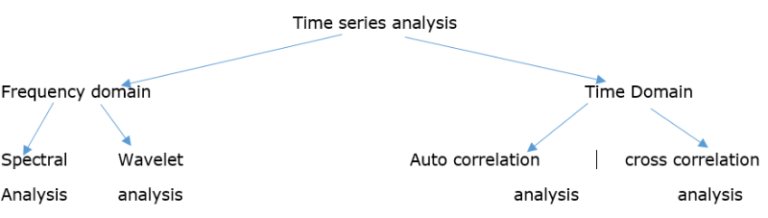

#### Técnicas utilizadas para el análisis de series de tiempo:

 1. Modelos ARMA, ARIMA
 2. Modelos multivariados caja-Jenkins.
 3. Holt inviernos suavización exponencial (simple, doble y triple)



## Suposiciones del modelo 
 1. Los datos deben ser estacionarios: por estacionarios significa que las propiedades de la serie no dependen del momento en que se capturan. Una serie de ruido blanco y series con comportamiento cíclico también pueden considerarse series estacionarias.
 2. Los datos deben ser univariados. ARIMA trabaja en una sola variable (La regresión automática tiene que ver con la regresión con los valores pasados).

## Pasos a seguir para el modelado ARIMA:

 1. Análisis exploratorio
 2. Encajar el modelo
 3. Medidas de diagnóstico.



## Importamos librerias necesarias importar data set, graficar y realizar la regresion

> En caso de no contar con la libreria "ggfortify" ejecutamos -> install.packages("ggfortify"). En el caso de la libreria "fUnitRoots" ejecutamos -> install.packages("fUnitRoots")

In [1]:
install.packages("fUnitRoots")
install.packages("ggfortify")
#install.packages("MTS")
#Librerias para visualizacion 
library(ggfortify)
library(fUnitRoots)
#Librerias para trabajar con predicciones con timesieres
library(tseries)
library(forecast)
library(lmtest)
library(MTS)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: ggplot2
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: zoo

Attaching package: ‘zoo’

The following object is masked from ‘package:timeSeries’:

    time<-

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Importamos dataset directo del Storage del proyecto
--

In [2]:
library("aws.s3")
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
Sys.setenv("AWS_ACCESS_KEY_ID" = "6ce4be664a4b48c2b3edaa8dd4873393", "AWS_SECRET_ACCESS_KEY" = "36853520c2dc8485afce48697e2a34dcb0e611ef68a056bd")
url <- "s3-api.us-geo.objectstorage.service.networklayer.com"
bucket <- "watsonday-donotdelete-pr-n7ldyiw6hna010"
headers <- list(`x-amz-content-sha256`="e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855")

obj <- s3HTTP(
    verb = "GET",
    bucket = bucket,
    headers = headers,
    path = "data_asset/ETC.csv_shaped_MTWM9YVaSVC4LamhDanTQQ.csv",
    key = Sys.getenv("AWS_ACCESS_KEY_ID"),
    secret = Sys.getenv("AWS_SECRET_ACCESS_KEY"),
    check_region = FALSE,
    base_url = url)
 
ETC <- read.csv(text = rawToChar(obj$content))
tail(ETC)


,COLUMN1,year,Minería,Extracción.de.petróleo.y.gas,Minería.de.minerales.metálicos.y.no.metálicos..excepto.petróleo.y.gas,Industrias.manufactureras,Industria.alimentaria,Industria.de.las.bebidas.y.el.tabaco,Fabricación.de.insumos.textiles.y.acabado.de.textiles,Fabricación.de.productos.textiles..excepto.prendas.de.vestir,⋯,Industria.del.plástico.y.del.hule,Fabricación.de.productos.a.base.de.minerales.no.metálicos,Industrias.metálicas.básicas,Fabricación.de.productos.metálicos,Fabricación.de.maquinaria.y.equipo,Fabricación.de.equipo.de.computación..comunicación..medición.y.de.otros.equipos..componentes.y.accesorios.electrónicos,Fabricación.de.accesorios..aparatos.eléctricos.y.equipo.de.generación.de.energía.eléctrica,Fabricación.de.equipo.de.transporte,Fabricación.de.muebles..colchones.y.persianas,Otras.industrias.manufactureras
43,42,2017-2,6623098,4977691,1645407,81772430,2230560,1321427,189838,120533,⋯,2226941,737534,2210107,1966318,4108815,15837776,5765398,36031418,567900,3831287
44,43,2017-3,8411303,6622858,1788445,86886088,2236706,1244923,178604,127493,⋯,2316454,716800,2316933,1975408,4037875,17748291,5950382,38825070,582959,3936291
45,44,2018,8431130,6285895,2145235,80382872,2314062,1265474,153677,109507,⋯,2208955,667406,2307942,1968402,3916698,13325448,5114120,38002308,511679,3704160
46,45,2018-1,8935409,6736752,2198657,88314182,2391188,1524808,176003,123145,⋯,2500713,818093,2517959,2177809,4598703,15709991,5919561,39769993,577575,4122292
47,46,2018-2,9193234,7183695,2009539,89835492,2256312,1468354,185349,135501,⋯,2405624,800814,2497032,2244026,4393381,16393748,5945402,41389435,585935,4116141
48,47,2018-3,8257426,6276450,1980976,94093045,2282875,1383639,186249,119840,⋯,2479894,790936,2292729,2229524,4497300,19085176,6310094,42536869,620220,4231770


Parseamos nuestos datos a series  de tiempo 
----
### El primer paso en el modelado de series de tiempo  es convertir los datos disponibles al formato de datos de series de tiempo. Graficamos la serie de tiempo para determinar visualmente si el conjunto de datos posiblemente tenga una media y una variación constantes.


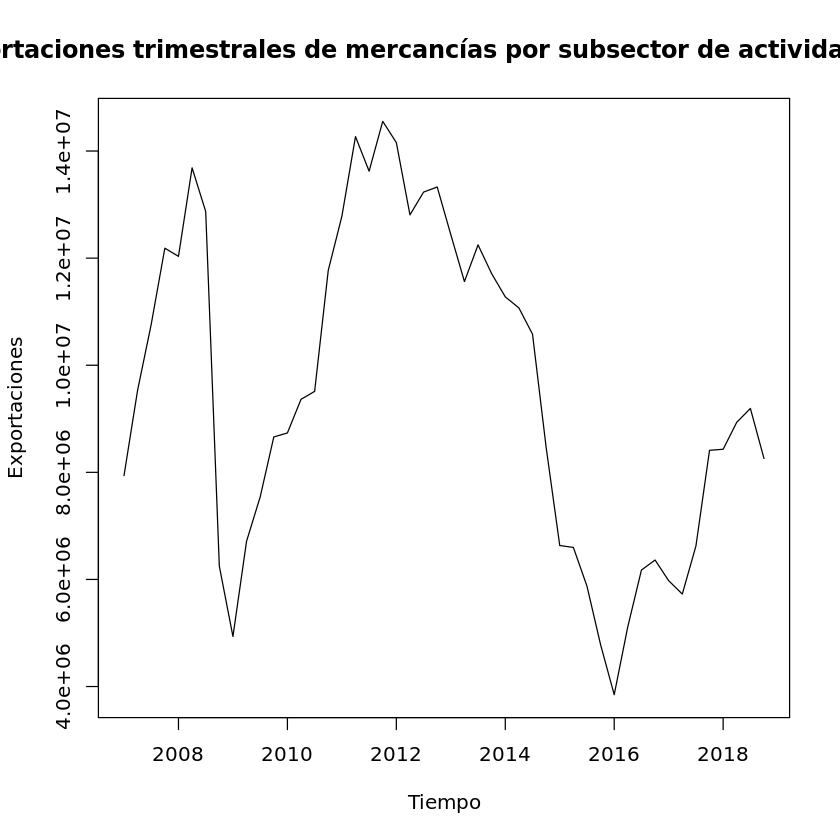

In [3]:
serie_1 <- ts(ETC['Minería'],frequency=4,start=c(2007,1))
plot(serie_1, xlab = "Tiempo", ylab = "Exportaciones",main="Exportaciones trimestrales de mercancías por subsector de actividad SCIAN")


## Análisis exploratorio
 1. Análisis de autocorrelación para examinar la dependencia en serie: se utiliza para estimar qué valor en el pasado tiene una correlación con el valor actual. Proporciona la estimación p, d, q para los modelos ARIMA.
 2. Análisis espectral para examinar el comportamiento cíclico: realizado para describir cómo la variación en una serie de tiempo puede ser explicada por componentes cíclicos. También se conoce como un análisis de dominio de frecuencia. Usando esto, los componentes periódicos en un ambiente ruidoso se pueden separar.
 3. Estimación y descomposición de la tendencia: se utiliza para el ajuste estacional. Busca construir, a partir de una serie temporal observada, una serie de componentes (que podrían usarse para reconstruir la serie original) donde cada una de ellas tiene una característica determinada.

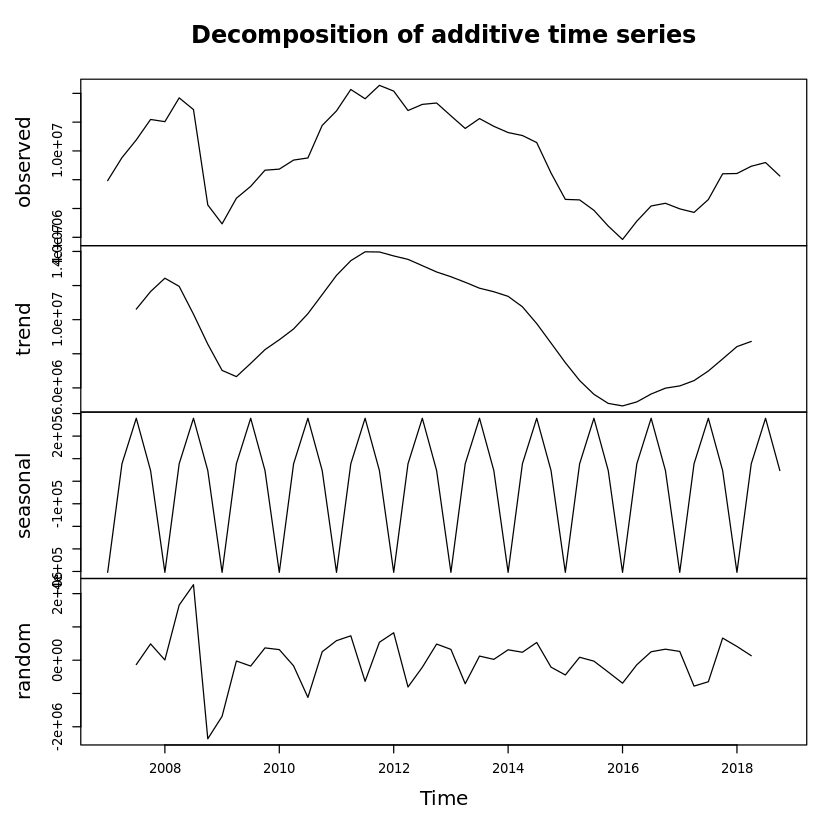

In [5]:
components_mineria.ts <- decompose(serie_1)
plot(components_mineria.ts)


In [7]:
deseasonal_mineria <- seasadj(components_mineria.ts)
deseasonal_mineria
#plot(deseasonal_mineria)

         Qtr1     Qtr2     Qtr3     Qtr4
2007  8342331  9457864 10486260 12138367
2008 12437040 13608325 12591391  6200897
2009  5338040  6635445  7260901  8613295
2010  9139570  9286443  9232945 11723992
2011 13184616 14191571 13343979 14507128
2012 14561569 12730301 12954096 13281160
2013 12842413 11485026 11968114 11662400
2014 11680408 10992843 10301144  8420290
2015  7037238  6520567  5594323  4733318
2016  4252170  5042457  5896254  6315134
2017  6380261  5649820  6343888  8363929
2018  8835081  8858041  8914024  8210052

>Aquí obtenemos 4 componentes:
* Observado - la trama de datos reales
* Tendencia: el movimiento general hacia arriba o hacia abajo de los puntos de datos
* Estacional: cualquier patrón mensual / anual de los puntos de datos
* Aleatorio - parte inexplicable de los datos.

# Usamos las pruebas de root test, KPSS y Dickey Fuller aumentada, para ver si la prueba sugiere si hay una media constante o no.

#### KPSS es la prueba determina si una serie de tiempo es estacionaria alrededor de una tendencia media o lineal, o no es estacionaria debido a una raíz unitaria. Una serie temporal estacionaria es aquella en la que las propiedades estadísticas, como la media y la varianza, son constantes a lo largo del tiempo.
* La hipótesis nula para la prueba es que los datos son estacionarios. 
* La hipótesis alternativa para la prueba es que los datos no son estacionarios.

##### La prueba de Dickey Fuller aumentada (ADF) es una prueba de raíz unitaria para determinar la estacionariedad. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. La prueba se puede utilizar con la correlación en serie.  Las hipótesis para la prueba:
* La hipótesis nula para esta prueba es que hay una raíz unitaria.
* La hipótesis alternativa varía ligeramente según la ecuación que estés usando. La alternativa básica es que la serie de tiempo es estacionaria (o de tendencia estacionaria).

Si los pasos de KPSS y Dickey Fuller aumentadosindican que hay una media no constante, entonces use la diferenciación para crear una nueva variable

In [9]:
kpss.test(serie_1) 


	KPSS Test for Level Stationarity

data:  serie_1
KPSS Level = 0.66136, Truncation lag parameter = 1, p-value = 0.01706


In [10]:
adf.test(serie_1)


	Augmented Dickey-Fuller Test

data:  serie_1
Dickey-Fuller = -2.1035, Lag order = 3, p-value = 0.5328
alternative hypothesis: stationary


# Graficamos el ACF para la serie de tiempo para observar la correlación de sus valores presentes con los pasados y encontrar los parámetros p y/o q para el modelo
ACF es la estimación de la función de correlación y correlación automática y cruzada
La función acf calcula (y, por defecto, los gráficos) estimaciones de la función de autocovarianza o autocorrelación. La función pacf es la función utilizada para las autocorrelaciones parciales. La función ccf calcula la correlación cruzada o la covarianza cruzada de dos series univariadas.

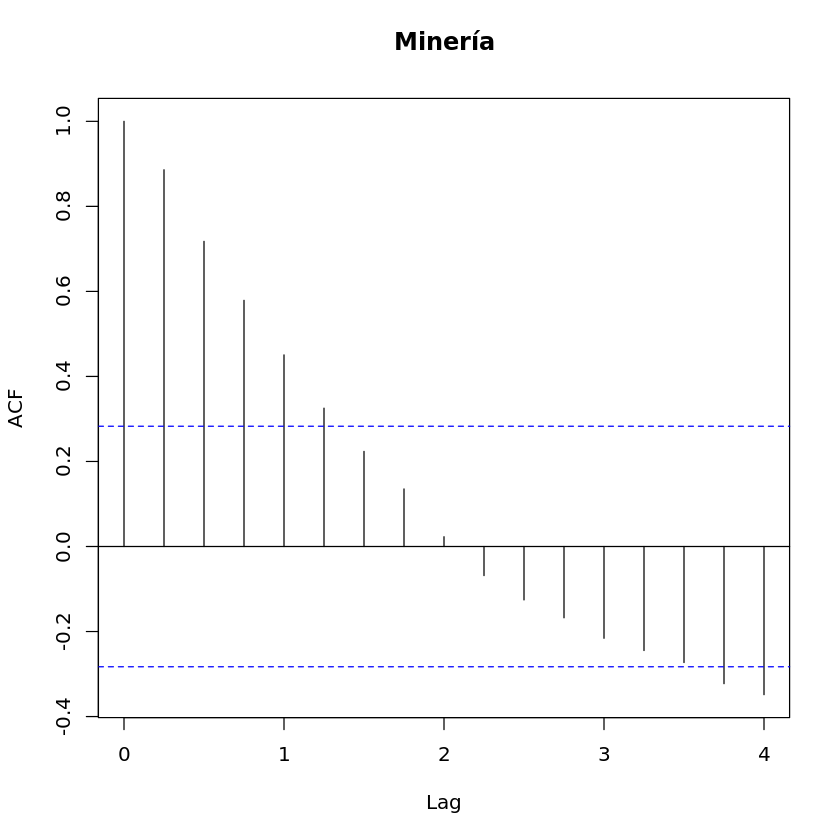

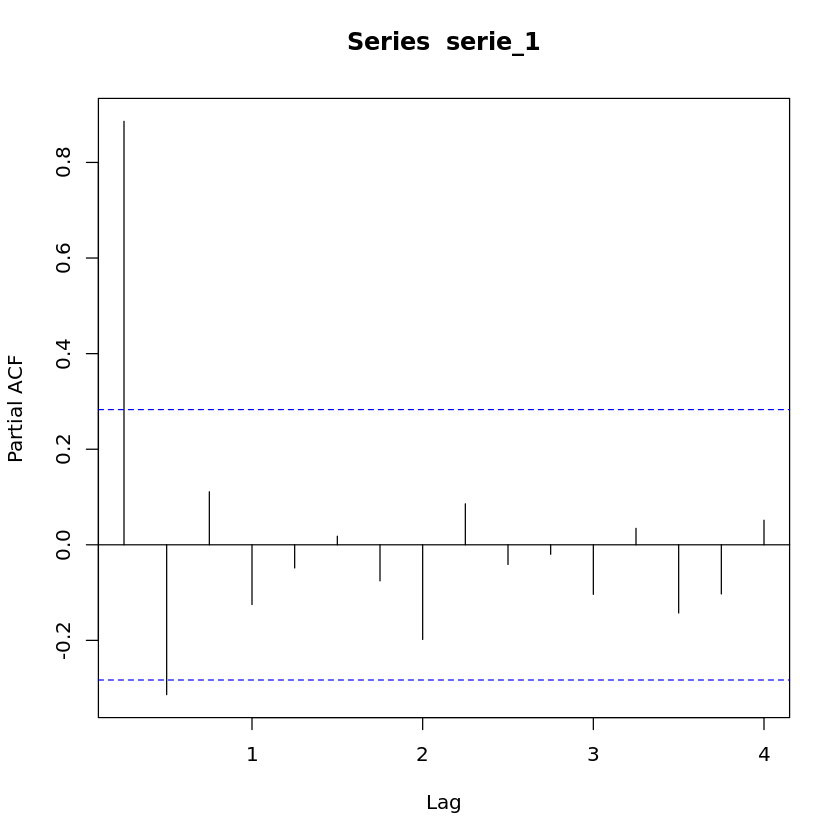

In [14]:
acf(serie_1) 
pacf(serie_1)

# Ajuste

ndiffs()
* Número de diferencias requeridas para una serie estacionaria -> "Stationary Series"
* Funcion para estimar el número de diferencias requeridas para hacer que una determinada serie de tiempo sea estacionaria. ndiffs estima el número de primeras diferencias necesarias.

nsdiffs()
* Número de diferencias requeridas para una serie estacionaria estacional -> "Seasonally Stationary Series"
* Funcion para estimar el número de diferencias requeridas para hacer que una determinada serie de tiempo sea estacionaria. nsdiffs estima el número de diferencias estacionales necesarias.

In [16]:
diferencias_mineria <- ndiffs(serie_1)
diferencias_mineria

[1] 1

[1] 1


	Augmented Dickey-Fuller Test

data:  nueva_mineria
Dickey-Fuller = -3.4754, Lag order = 3, p-value = 0.05622
alternative hypothesis: stationary


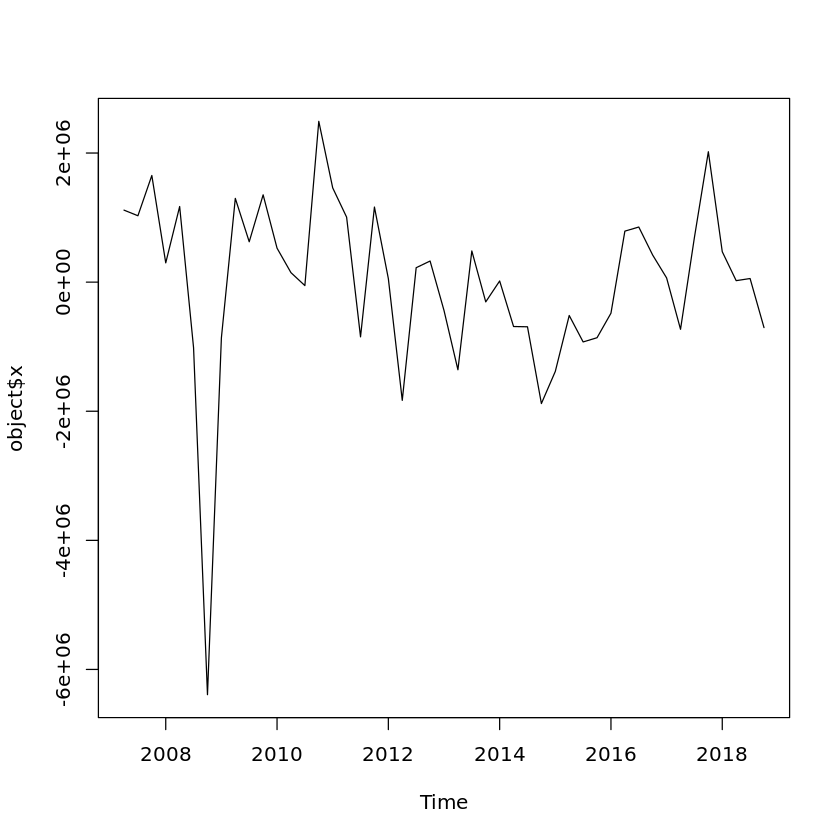

In [18]:
nueva_mineria = diff(deseasonal_mineria, differences = diferencias_mineria)
plot(nueva_mineria)
adf.test(nueva_mineria, alternative = "stationary")

# Parámetros p y q

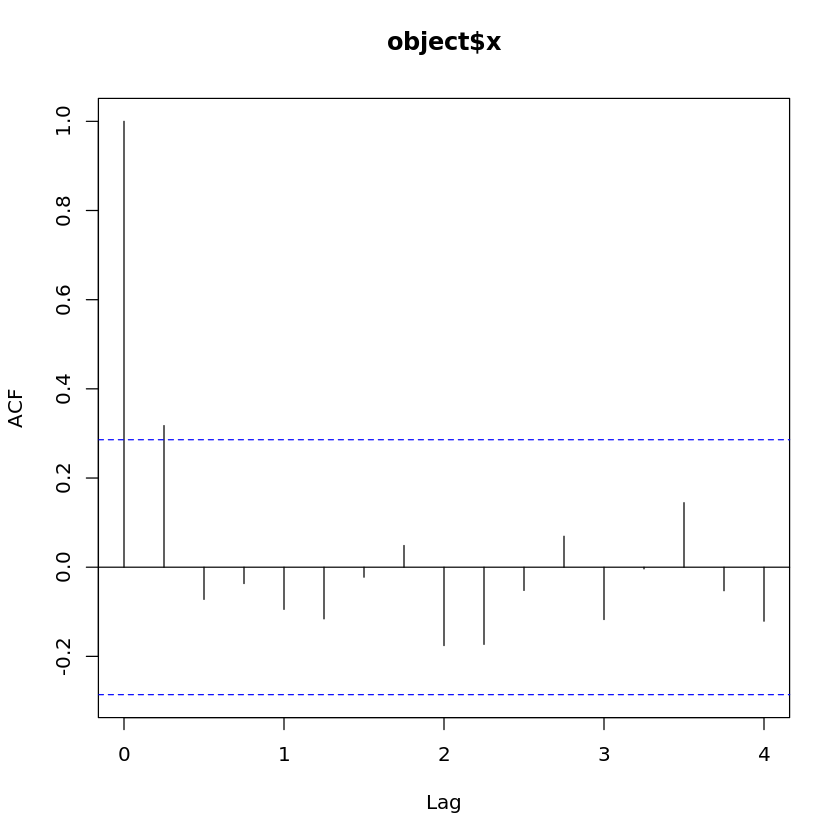

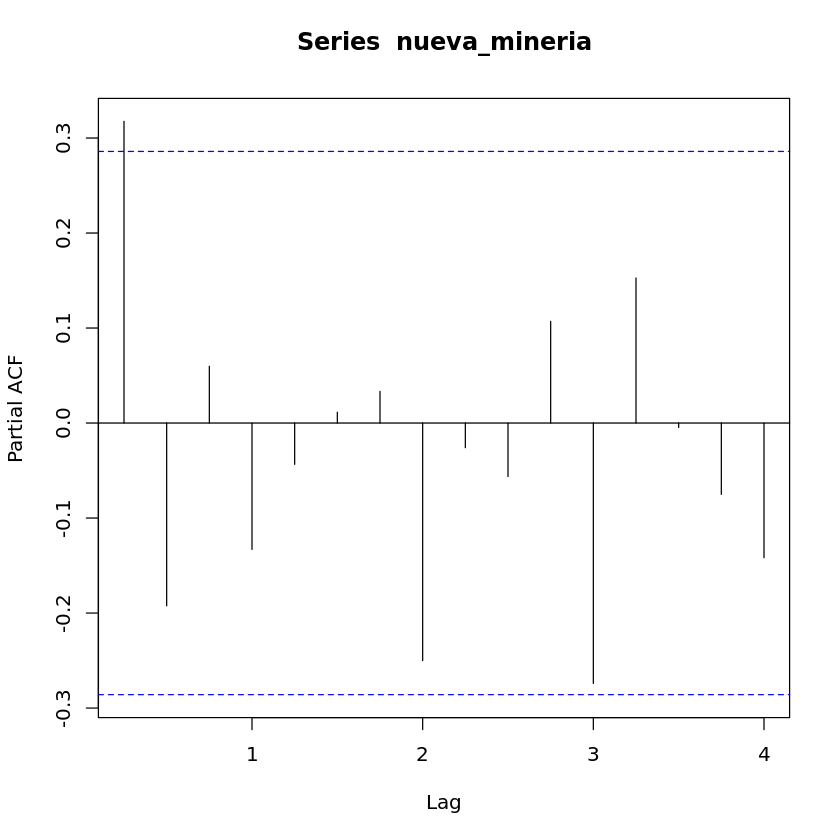

In [20]:
acf(nueva_mineria)
pacf(nueva_mineria)


### Modelado de arima
ARIMA es la abreviatura de Media Móvil Integrada AutoRegressive. Los términos de regresión automática (AR) se refieren a los retrasos de las series diferenciadas, los términos de media móvil (MA) se refieren a los retrasos de los errores y I es la cantidad de diferencia utilizada para hacer que las series de tiempo sean estacionarias.


In [22]:
auto.arima(deseasonal_mineria, seasonal=FALSE)

Series: deseasonal_mineria 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.4405
s.e.  0.1479

sigma^2 estimated as 1.612e+12:  log likelihood=-726.84
AIC=1457.67   AICc=1457.94   BIC=1461.37

# Evaluar e iterar

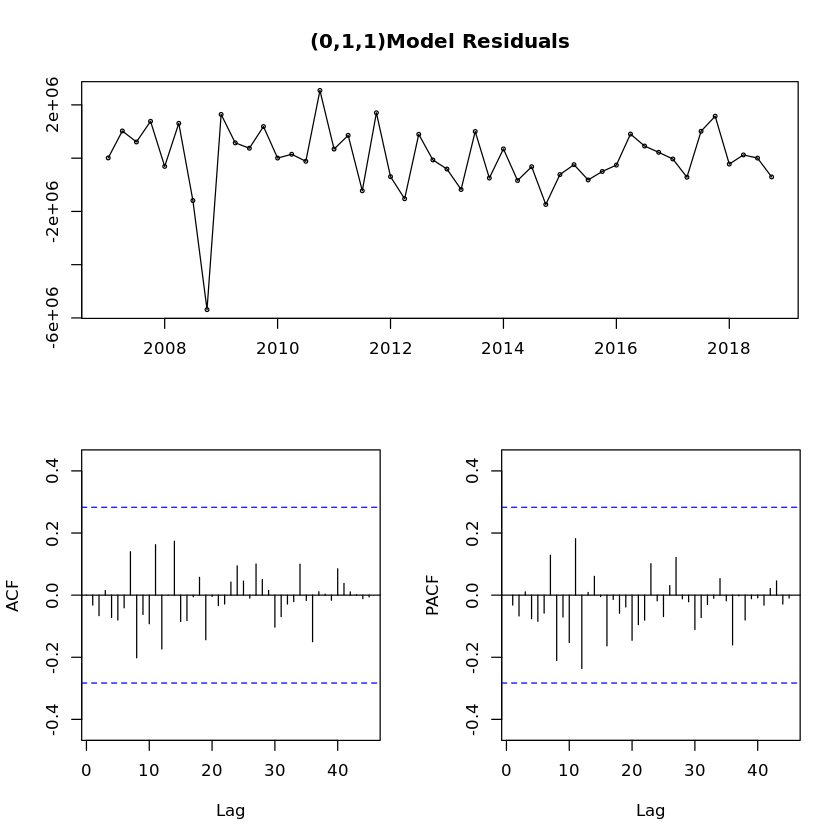

In [24]:
fit_mineria<- auto.arima(deseasonal_mineria, seasonal=FALSE)
tsdisplay(residuals(fit_mineria), lag.max=45, main='(0,1,1)Model Residuals')

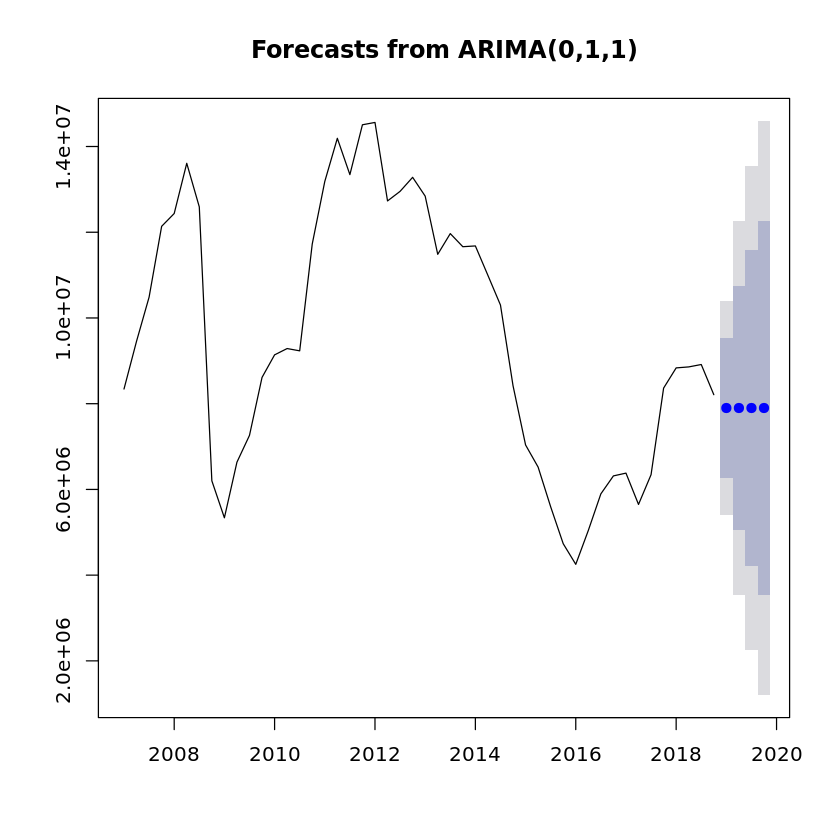

In [26]:
fcast_mineria <- forecast(fit_mineria, h=4)
plot(fcast_mineria)

In [28]:
fit_mineria_seasonality = auto.arima(deseasonal_mineria, seasonal=TRUE)
fit_mineria_seasonality


Series: deseasonal_mineria 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.4405
s.e.  0.1479

sigma^2 estimated as 1.612e+12:  log likelihood=-726.84
AIC=1457.67   AICc=1457.94   BIC=1461.37

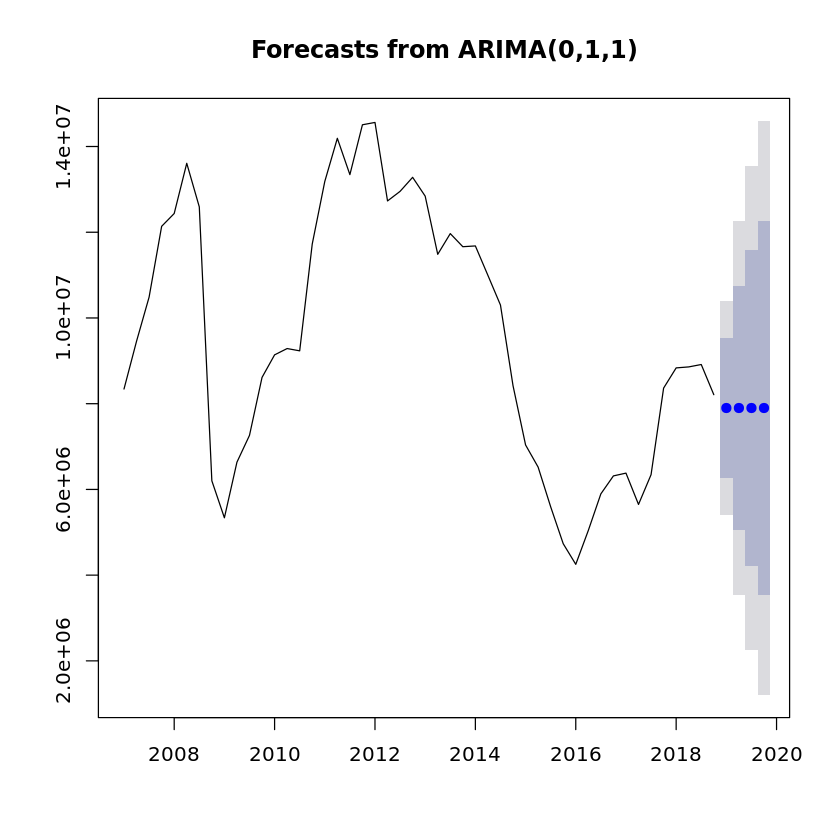

In [30]:
seas_fcast_mineria <- forecast(fit_mineria_seasonality, h=4)
plot(seas_fcast_mineria)